# Data Exploration

## Imports

In [23]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
import plotly.io as pio
from IPython.display import Image
import sys,os

In [24]:
import matplotlib.pyplot as plt

In [25]:
sys.path.append(os.path.abspath(os.path.join('../modules')))
warnings.filterwarnings("ignore")
sns.set()
pd.set_option('display.float_format', '{:.2f}'.format)
colors = ['#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF',
          '#FECB52', '#636EFA', '#EF553B', '#00CC96', '#AB63FA', ]

In [26]:
from load_file import FileHandler
from overview import DfOverview
from cleaner_df import DfCleaner
from outlier import DfOutlier
from vis_seaborn import VisSeaborn
from vis_plotly import VisPlotly

In [27]:
snb = VisSeaborn()
read_file = FileHandler()

## Data

In [28]:
df_store = read_file.read_csv('../data/store.csv')
df_train = read_file.read_csv('../data/train.csv')
df_test = read_file.read_csv('../data/test.csv')
print("\n### General data Structure ###\n")

print("Stored clean data:",df_store.shape)
print("Train clean data:",df_train.shape)
print("Test clean data:",df_test.shape)

2022-05-25 10:58:09,117 — DfHelper — DEBUG — file read as csv
2022-05-25 10:58:09,632 — DfHelper — DEBUG — file read as csv
2022-05-25 10:58:09,674 — DfHelper — DEBUG — file read as csv

### General data Structure ###

Stored clean data: (1115, 13)
Train clean data: (1017209, 9)
Test clean data: (41088, 8)


In [29]:
stores_types = ["Store type A", "Store type B", "Store type C", "Store type D"]
state_holidays = [ "Normal Day", "Public holiday", "Easter holiday", "Christmas"] 
school_holidays = ["School is closed", "School is open"]
assortment = [ "Basic", "Extra", "Extended"] 
promo = ["Not participating", "Participating"]
store_open = ["Closed", "Open"]

### `Distribution of promotion in the training and test datasets`

In [73]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1,0,0,0
41084,41085,1112,6,2015-08-01,1,0,0,0
41085,41086,1113,6,2015-08-01,1,0,0,0
41086,41087,1114,6,2015-08-01,1,0,0,0


In [74]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1485,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1


## Exploring Test and Train data

In [30]:
train_data = df_train.copy()
test_data = df_test.copy()

- Look in to the `test data` and the `training data` if  there is any relation 

In [31]:
def compare_test_train(train_data, test_data, feature, title):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
    ax[0].set_title("Train " + title)
    sns.countplot(x=feature, data=train_data, ax=ax[0])
    
    ax[1].set_title("Test " + title)
    sns.countplot(x=feature, data=test_data, ax=ax[1])
    fig.subplots_adjust(wspace=0.3)
    fig.show()

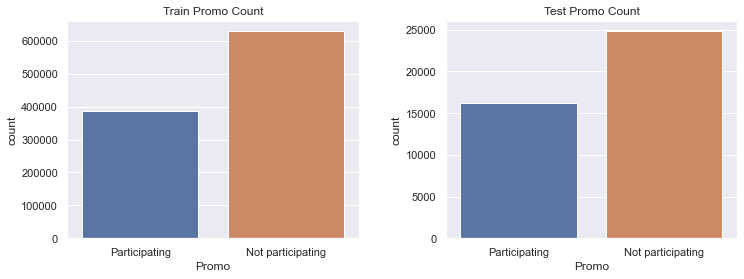

In [32]:
train_data["Promo"] = train_data["Promo"].apply(lambda x: promo[x])
test_data["Promo"] = test_data["Promo"].apply(lambda x: promo[x])
compare_test_train(train_data, test_data, 'Promo', "Promo Count")

- `Promo` features in both training and tast data, looks proportional.

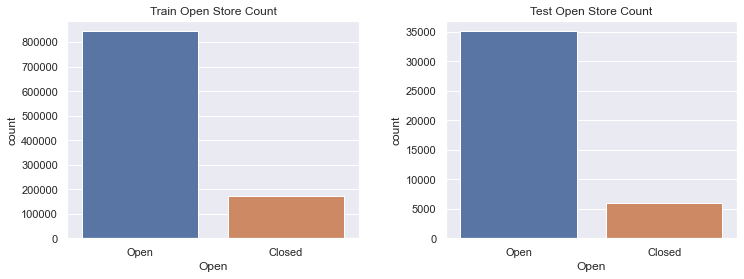

In [33]:
train_data["Open"] = train_data["Open"].apply(lambda x: store_open[x])
test_data["Open"] = test_data["Open"].apply(lambda x: store_open[x])
compare_test_train(train_data, test_data, 'Open', "Open Store Count")

- The number of stores `open` and `closed` features in both training and tast data, looks proportional.

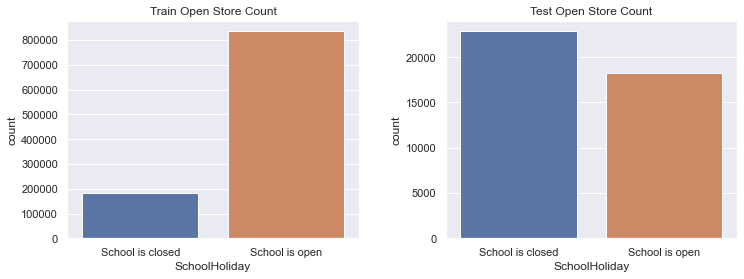

In [34]:
train_data["SchoolHoliday"] = train_data["SchoolHoliday"].apply(lambda x: school_holidays[x])
test_data["SchoolHoliday"] = test_data["SchoolHoliday"].apply(lambda x: school_holidays[x])
compare_test_train(train_data, test_data, 'SchoolHoliday', "Open Store Count")

**Observattion:** 
- in our test data in sels are more in school closed than open.
- In this case, `training data` is more reliable than  `test data`.

In [35]:
state_holiday_train = train_data.groupby(['StateHoliday']).agg({'StateHoliday': ['count']})
state_holiday_train.columns = ['count']
state_holiday_train = state_holiday_train.reset_index()
state_holiday_train["StateHoliday"] = state_holiday_train["StateHoliday"].apply(lambda x: state_holidays[x])
state_holiday_train

,StateHoliday,count
0,Normal Day,986159
1,Public holiday,20260
2,Easter holiday,6690
3,Christmas,4100


In [36]:
state_holiday_test = df_test.groupby(['StateHoliday']).agg({'StateHoliday': ['count']})
state_holiday_test.columns = ['count']
state_holiday_test = state_holiday_test.reset_index()
state_holiday_test["StateHoliday"] = state_holiday_test["StateHoliday"].apply(lambda x: state_holidays[x])
state_holiday_test

,StateHoliday,count
0,Normal Day,40908
1,Public holiday,180


**Observation -**
- The proportion of normal days to public holidays is 0.02. This means for every 100 normal days we have 2 public holidays.
- In Test data,the proportion of normal days to public holidays it's 0.004, which is for 1000 normal days 4 public holidays. 
- Easter and Christmas are not in the test data as holyday.

### Merging store and train datasets

In [37]:
df_train_store = pd.merge(df_train.reset_index(), df_store, how='inner', on='Store')

df_train_store.shape

(1017209, 22)

In [38]:
df_train_store['Date'] = pd.DatetimeIndex(df_train_store['Date'])
df_train_store['Year'] = pd.DatetimeIndex(df_train_store['Date']).year
df_train_store['Month'] = pd.DatetimeIndex(df_train_store['Date']).month
df_train_store['Day'] = pd.DatetimeIndex(df_train_store['Date']).day
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   index                      1017209 non-null  int64         
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Date                       1017209 non-null  datetime64[ns]
 4   Sales                      1017209 non-null  int64         
 5   Customers                  1017209 non-null  int64         
 6   Open                       1017209 non-null  int64         
 7   Promo                      1017209 non-null  int64         
 8   StateHoliday               1017209 non-null  int64         
 9   SchoolHoliday              1017209 non-null  int64         
 10  StoreType                  1017209 non-null  int64         
 11  Assortment                 1017209 no

## Analysis based on Seasonality

In [39]:
df = df_train_store.copy()

In [40]:
df["StoreType"] = df["StoreType"].apply(lambda x: stores_types[x])
store_type_df = df.groupby('StoreType').agg({'Customers': 'mean', 'Sales': 'mean'})
store_type_df = store_type_df.reset_index()
store_type_df


,StoreType,Customers,Sales
0,Store type A,640.03,5640.54
1,Store type B,1321.56,9198.32
2,Store type C,663.82,5668.12
3,Store type D,501.29,5611.88


**Observation -** 
- `Store type B` has higher number of customers trhan others store types.

In [41]:
date_df = df.groupby('Year').agg({'Customers': 'mean', 'Sales': 'mean'})
date_df = date_df.reset_index()
date_df.head()

,Year,Customers,Sales
0,2013,607.24,5574.86
1,2014,620.08,5747.61
2,2015,603.79,5800.55


- The stores have similar average sales and average customer count throughout the three years

### `Daily sales trend per store type`

In [42]:
def plot_trend(df, columns, feature, title, x_label="", y_label="", labels=['']):
  plt.figure(figsize=(18, 6))
  for i in range(len(columns)):
    sns.lineplot(x=df.index, y=df[columns[i]][feature], label=labels[i])
  plt.title(title, fontsize=15, fontweight='bold')
  plt.ylabel(x_label, fontsize=14)
  plt.xlabel(y_label, fontsize=14)
  plt.show()

In [43]:
daily_trend = df.groupby(['Day', 'StoreType']).agg({'Customers': 'mean', 'Sales': 'mean'})
daily_trend = daily_trend.unstack().swaplevel(0, 1, 1).sort_index(1)

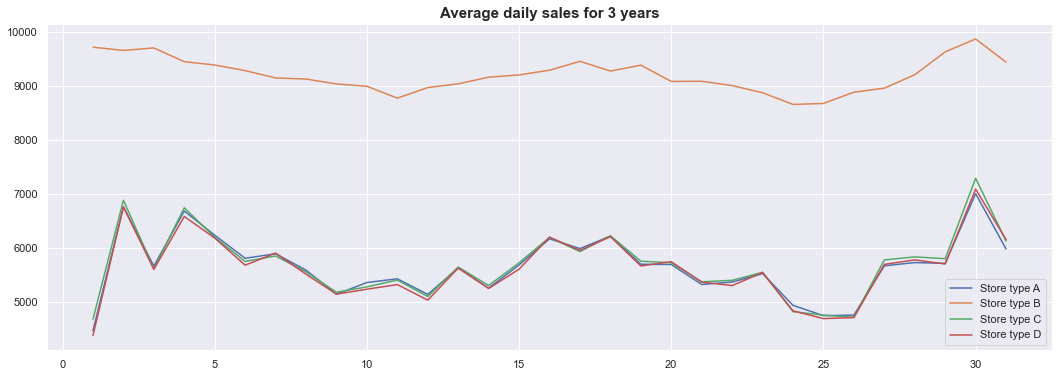

In [44]:
columns = ["Store type A", "Store type B", "Store type C", "Store type D"]
plot_trend(daily_trend, columns, 'Sales', 'Average daily sales for 3 years', labels=columns)

**Observation-** 
- Here we can see there is a very similar trend in through a month between the stores `A`,`C` and `D`. 
- `Store B` has more sales but still, the variation pattern is still similar.

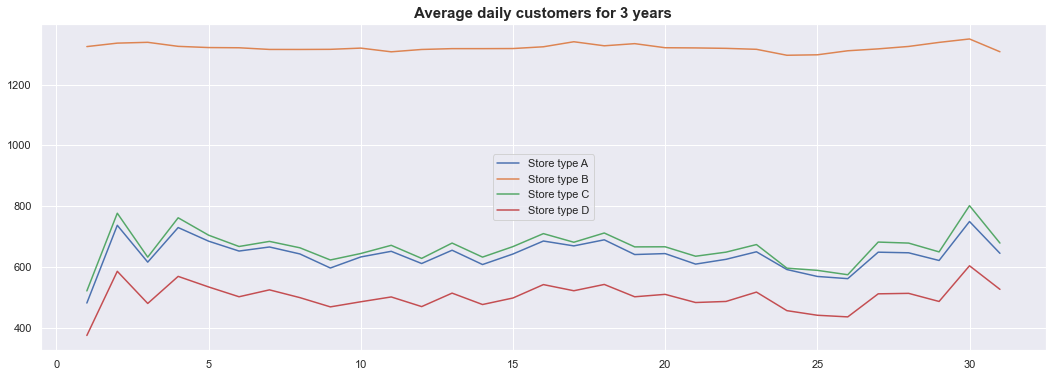

In [45]:
plot_trend(daily_trend, columns, 'Customers', 'Average daily customers for 3 years', labels=columns)

- We can observe there is a similarity between the average sales and the average number of customers.

### `Monthly avarage sales trend per store type`

In [46]:
monthly_trend = df.groupby(['Month', 'StoreType']).agg( {'Customers': 'mean', 'Sales': 'mean'})
monthly_trend = monthly_trend.unstack().swaplevel(0, 1, 1).sort_index(1)

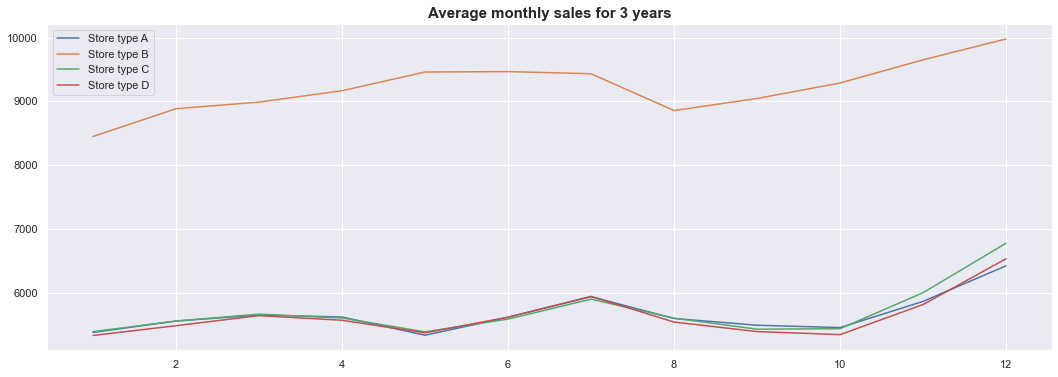

In [47]:
plot_trend(monthly_trend, columns, 'Sales', 'Average monthly sales for 3 years', labels=columns)

**Observation-**
- We can see the high points in sales are `April`, `July`, and `December`.
To understand the reasons behind this we should consider the fact that the Rosman store is located in Germany.
These are the main holidays in Germany.
- `January:` New Year’s Day(Neujahrstag)
- `April:` Good Friday(Karfreitag)
- `April:` Easter Monday(Ostermontag)
- `May:` Labor Day(Maifeiertag)
- `May:` Ascension Day(Christi Himmelfahrt, 40 days after Easter)
- `May:` Whit Monday(Pfingstmontag) – seventh Monday after Easter.
- `October:` Day of German Unity(Tag der Deutschen Einheit)
- `October:` Reformation Day(Reformationstag) – generally a regional holiday in

**Let's check in our data to confirm**

In [48]:
df["StateHoliday"] = df["StateHoliday"].apply(lambda x: state_holidays[x])
df["SchoolHoliday"] = df["SchoolHoliday"].apply(lambda x: school_holidays[x])

In [49]:
public_holiday = df[["Month"]].loc[df["StateHoliday"] == state_holidays[1]]
easter_holiday = df[["Month"]].loc[df["StateHoliday"] == state_holidays[2]]
christmas_holiday = df[["Month"]].loc[df["StateHoliday"] == state_holidays[3]]

In [50]:
print("Public Hollydays are in months: ", np.sort(public_holiday["Month"].unique()))
print("Easter is in months: ", np.sort(easter_holiday["Month"].unique()))
print("Chrismass is in month: ", np.sort(christmas_holiday["Month"].unique()))

Public Hollydays are in months:  [ 1  5  6  8 10 11]
Easter is in months:  [3 4]
Chrismass is in month:  [12]


- This confirms our assumption that the increase in sales is due to holiday shopping. There another Interesting point is, salles increase throughout the stores leading to this holidays and there is a decline in sells after this holidays.

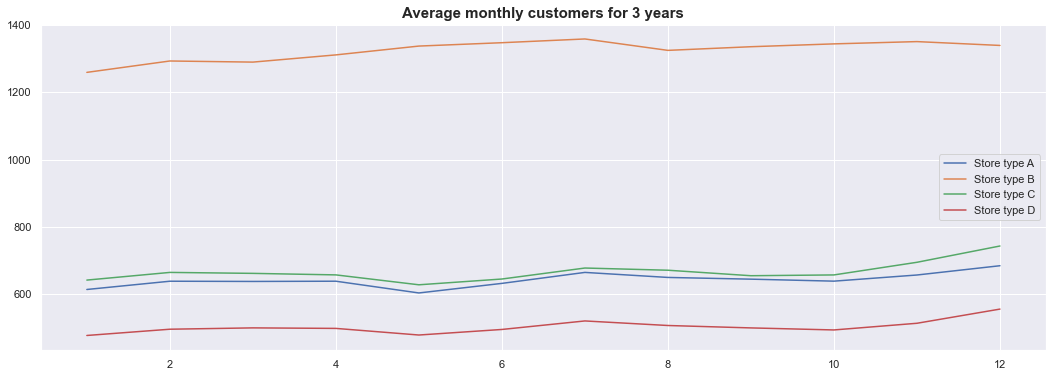

In [51]:
plot_trend(monthly_trend, columns, 'Customers', 'Average monthly customers for 3 years', labels=columns)

- here also we see similarities between sales and the number of customers. 
Next, we will explore this more in-depth.

## Correlation Analysis

In [52]:
df = df_train_store.copy()
corr_all = df_train_store[['Open', 'Promo', 'Promo2', 'Sales', 'Customers', 'DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'StoreType',
                           'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].corr()

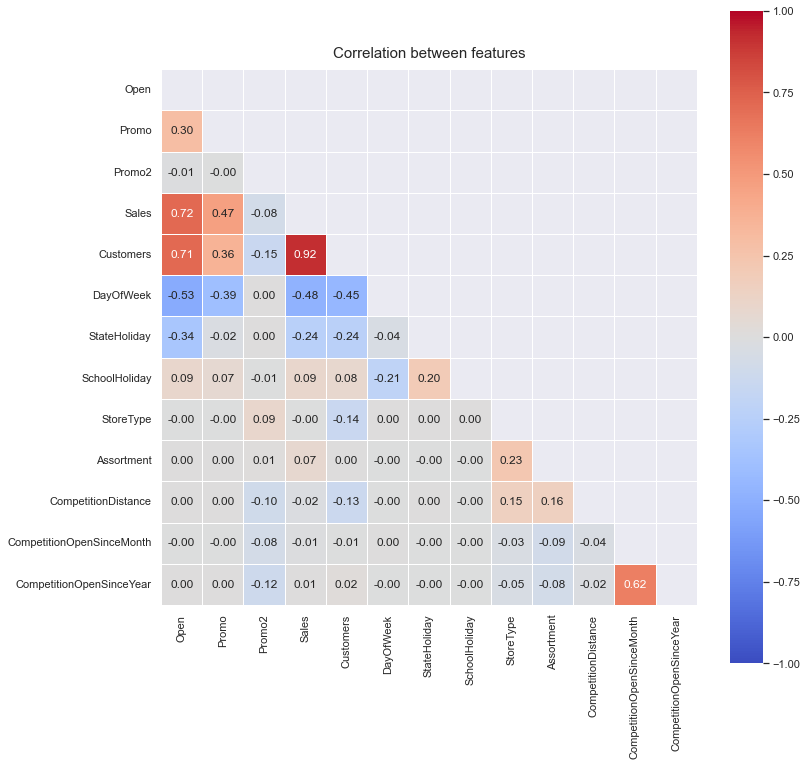

In [53]:
mask = np.zeros_like(corr_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(230, 20, as_cmap=True)

fig, ax = plt.subplots(figsize=(12, 12))
heatmap = sns.heatmap(corr_all, mask=mask, square=True, linewidths=.5,
                      vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')
heatmap.set_title('Correlation between features', fontdict={'fontsize': 15}, pad=12)
fig.show()


- From the above correlation matrix, we observe the following. There is a strong positive correlation between sales and Customers. Promo has a positive correlation with sales and customers. State holidays and Days of the week have a negative correlation with sales and customers. We will explore these correlations more in-depth.

Impact of number of customers on sales. 

In [54]:
df["StoreType"] = df["StoreType"].apply(lambda x: stores_types[x])
df = df.sort_values(by='Day', ascending=False)


In [55]:
df = df.sort_values(by='Month', ascending=False)


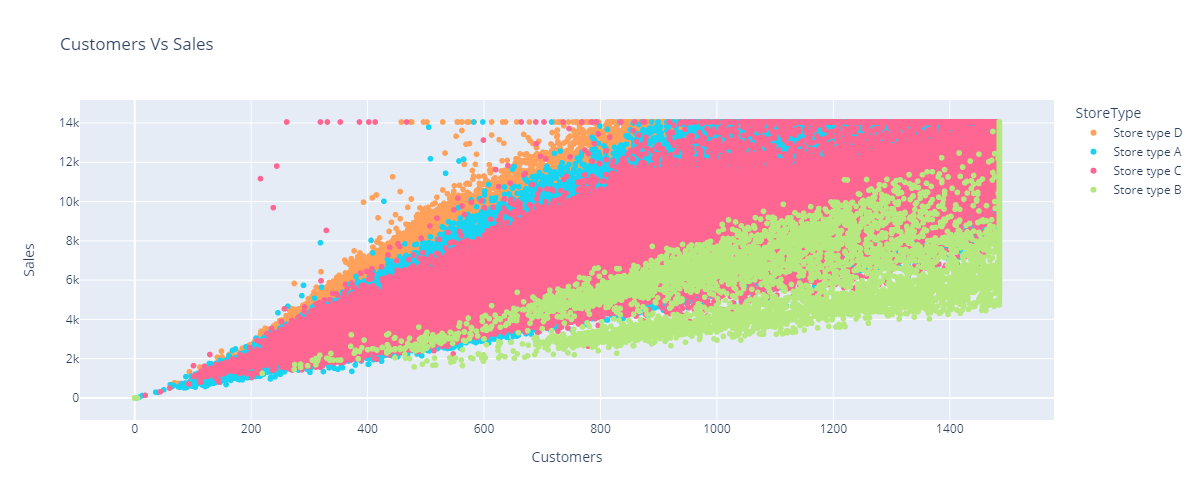

In [56]:
fig = px.scatter(df, x="Customers", y="Sales", color="StoreType",
                 color_discrete_sequence=colors, title="Customers Vs Sales")
Image(pio.to_image(fig, format='png', width=1200))
# fig.show()

As we can see when the number of customers increases sales also increase.

### `Impact of Promo on customers and sales`

In [57]:
df["Promo"] = df["Promo"].apply(lambda x: promo[x])
df["Promo2"] = df["Promo2"].apply(lambda x: promo[x])

In [58]:
overall_trend = df.groupby(['Promo', 'Promo2',]).agg({'Customers': 'mean', 'Sales': 'mean'})
overall_trend

Customers   Sales
Promo             Promo2                              
Not participating Not participating     549.90 4653.15
                  Participating         451.17 4083.00
Participating     Not participating     858.88 8163.34
                  Participating         722.38 7508.55

### `Monthly sales per StoreType and Promo`

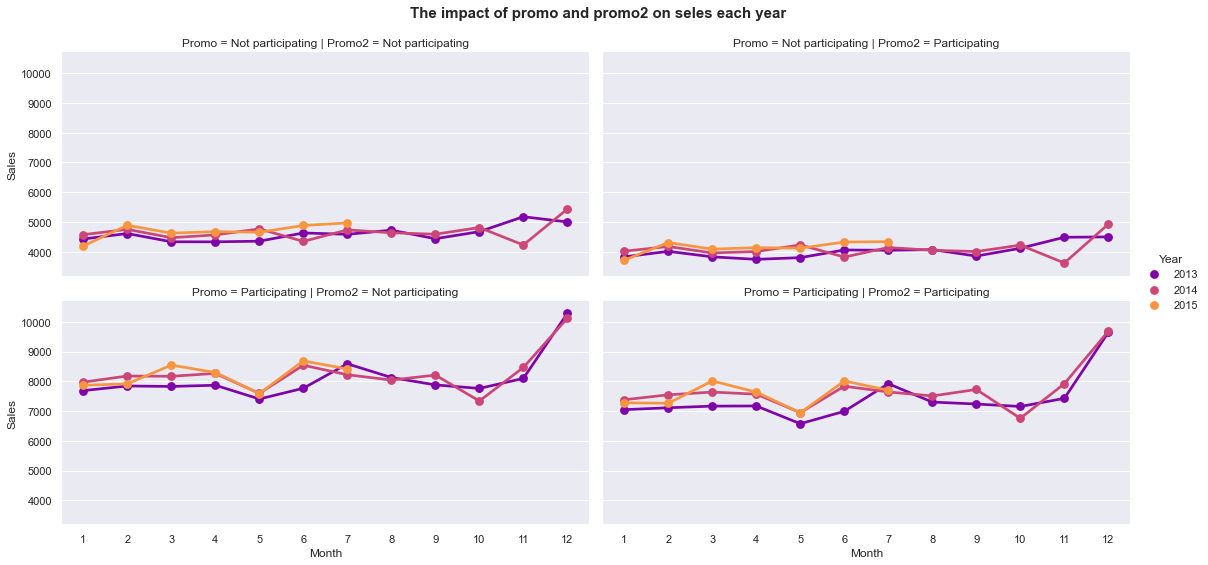

In [59]:
fp = sns.factorplot(data=df, x='Month', y="Sales", palette='plasma', hue='Year',
                    row='Promo', col='Promo2', color='green', size=4, aspect=2)
fp.fig.subplots_adjust(top=.9) 
fp.fig.suptitle("The impact of promo and promo2 on seles each year", fontsize=15, fontweight='bold')
plt.show()

This is the most interesting plot, I think. Promo 1 has a positive impact on sales and there is clearly more sales when the promo is running. Promo2 has a little bit of a negative impact on sales. From this, we can suggest the company should stop spending on Promo2 and 
they should focus more on Promo.

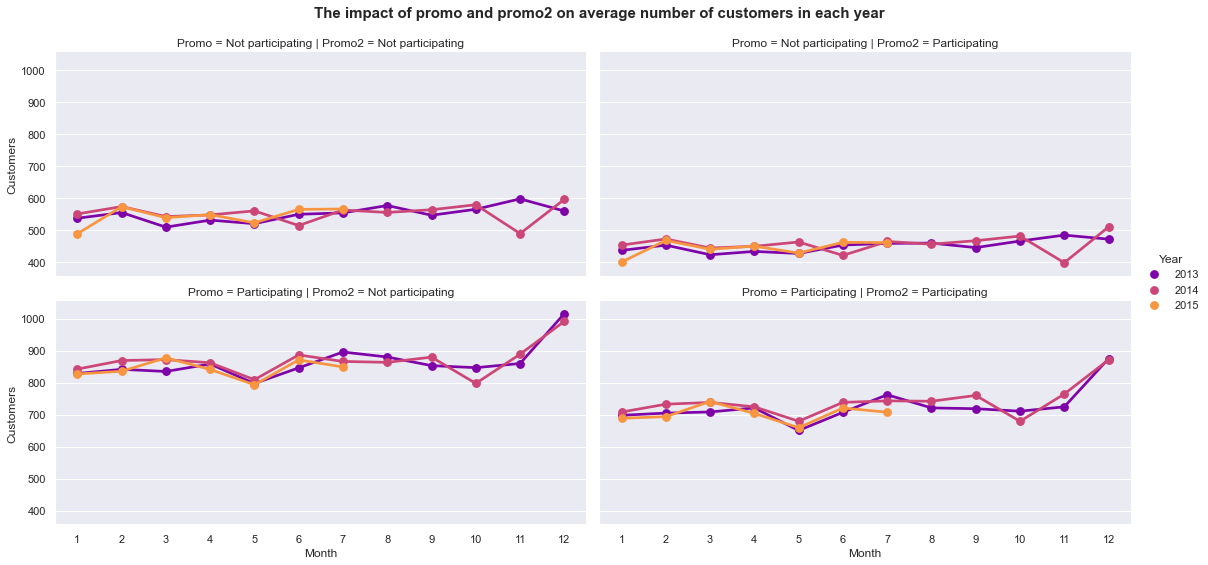

In [60]:
fp = sns.factorplot(data=df, x='Month', y="Customers", palette='plasma', hue='Year',
                    row='Promo', col='Promo2', color='green', size=4, aspect=2)
fp.fig.subplots_adjust(top=.9) 
fp.fig.suptitle("The impact of promo and promo2 on average number of customers in each year", fontsize=15, fontweight='bold')
plt.show()

This is similar with sales.

### `customer behavior during store open and closing times`

In [61]:
open_days_data = df[df['Open'] == 1]
closed_days_data = df[df['Open'] == 0]

In [62]:
open_days_data.groupby('Date')["Customers"].mean()

Date
2013-01-01   985.47
2013-01-02   729.06
2013-01-03   670.54
2013-01-04   691.15
2013-01-05   606.03
              ...  
2015-07-27   845.29
2015-07-28   765.95
2015-07-29   725.18
2015-07-30   751.36
2015-07-31   840.96
Name: Customers, Length: 942, dtype: float64

### `Impact of weekdays on sales`

Text(0.5, 1.0, 'Assortment Vs Customers ')

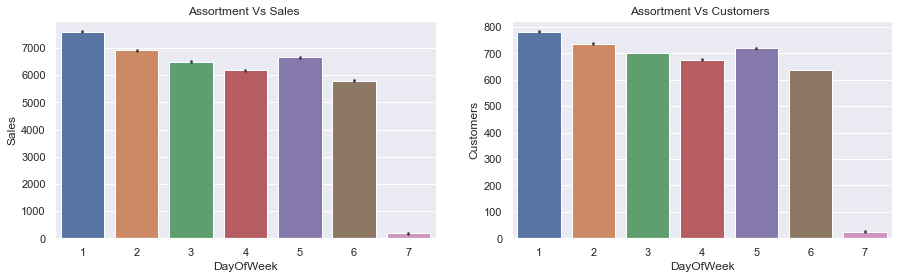

In [81]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(x='DayOfWeek', y='Sales', data=df, ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=df, ax=axis2)
axis1.set_title("Assortment Vs Sales " )
axis2.set_title("Assortment Vs Customers ")

In [63]:
weekly_data = df.groupby(['DayOfWeek']).agg({'DayOfWeek': 'count', 'Customers': 'mean', 'Sales': 'mean'})
weekly_data.columns = ['count', 'Customers',	'Sales']
weekly_data

,count,Customers,Sales
DayOfWeek,,,
1,144730,781.51,7599.14
2,145664,736.73,6907.14
3,145665,700.53,6490.33
4,145845,675.86,6185.29
5,145845,718.93,6651.85
6,144730,636.84,5794.27
7,144730,24.98,183.36


In [64]:
weekdays_data = df[df['DayOfWeek'] < 6]
weekend_data = df[df['DayOfWeek'] >= 6]

### `by Assortment type`

In [65]:
df["Assortment"] = df["Assortment"].apply(lambda x: assortment[x])

Text(0.5, 1.0, 'Assortment Vs Customers ')

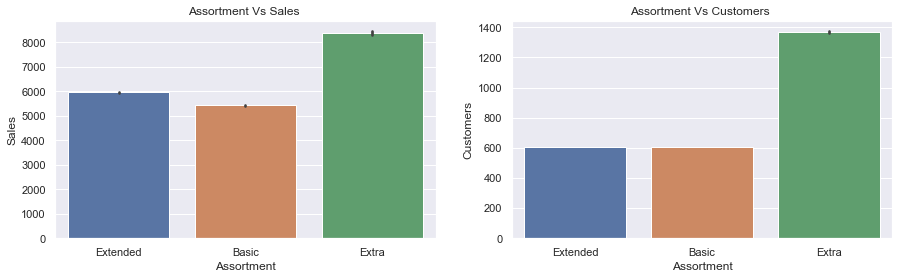

In [66]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(x='Assortment', y='Sales', data=df, ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=df, ax=axis2)
axis1.set_title("Assortment Vs Sales " )
axis2.set_title("Assortment Vs Customers ")

### `impact of distance of competitor on sales`


In [67]:
df_competition = df.groupby("Store").agg({ "Sales": "sum", 
                                           "Customers": "sum",
                                           "CompetitionDistance": "mean",
                                           "CompetitionOpenSinceYear": "mean",
                                           })
df_competition

,Sales,Customers,CompetitionDistance,CompetitionOpenSinceYear
Store,,,,
1,3716854,440523,1270.00,2008.00
2,3883858,457855,570.00,2007.00
3,5405105,584216,14130.00,2006.00
4,7523256,1014958,620.00,2009.00
5,3642818,418588,16107.00,2015.00
...,...,...,...,...
1111,4091076,351883,1900.00,2014.00
1112,7694122,652807,1880.00,2006.00
1113,5194013,561801,9260.00,1990.00


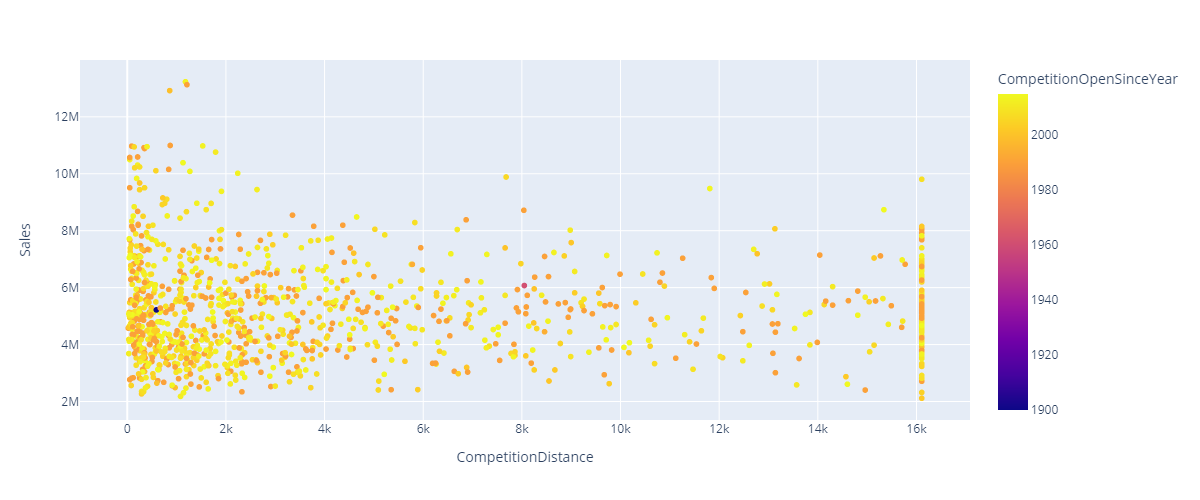

In [68]:
fig = px.scatter(df_competition, 
                 x="CompetitionDistance", 
                 y="Sales", 
                color="CompetitionOpenSinceYear")
Image(pio.to_image(fig, format='png', width=1200))

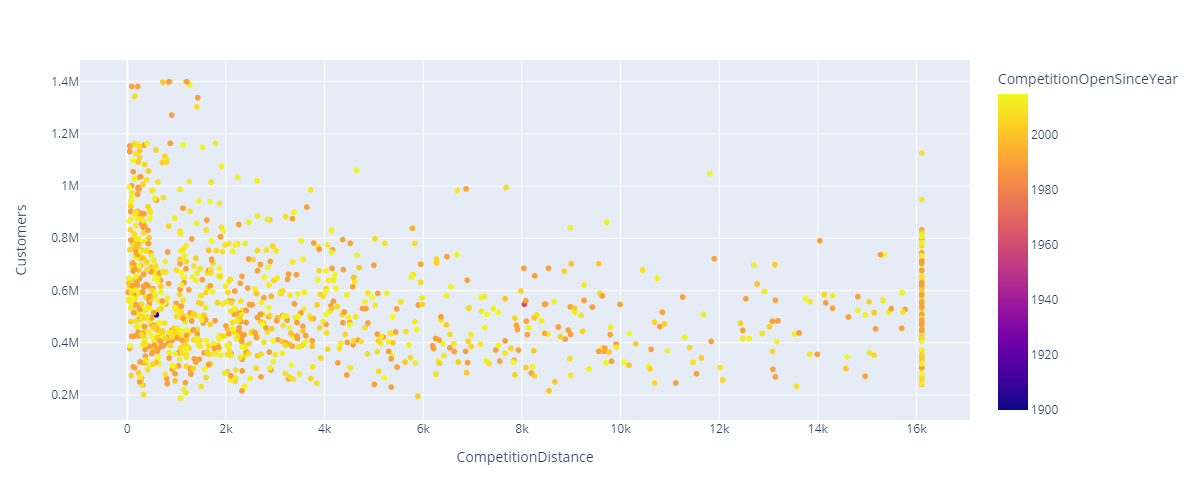

In [69]:
fig = px.scatter(df_competition, x="CompetitionDistance", y="Customers", color="CompetitionOpenSinceYear",
                 color_discrete_sequence=colors)
Image(pio.to_image(fig, format='png', width=1200))


### `Sales before, after and during Christmas`

In [ ]:
"""def convert_to_datetime(df, columns):
        for col in columns: 
          df[col] = pd.to_datetime(df[col]) 
          return df"""

In [93]:
convert_to_datetime(df_train, ['Date'])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1485,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1


In [94]:
df_train["Date"][0]

Timestamp('2015-07-31 00:00:00')

In [97]:
df_train["Date"].min()# Timestamp('2015-07-31 00:00:00')

Timestamp('2013-01-01 00:00:00')

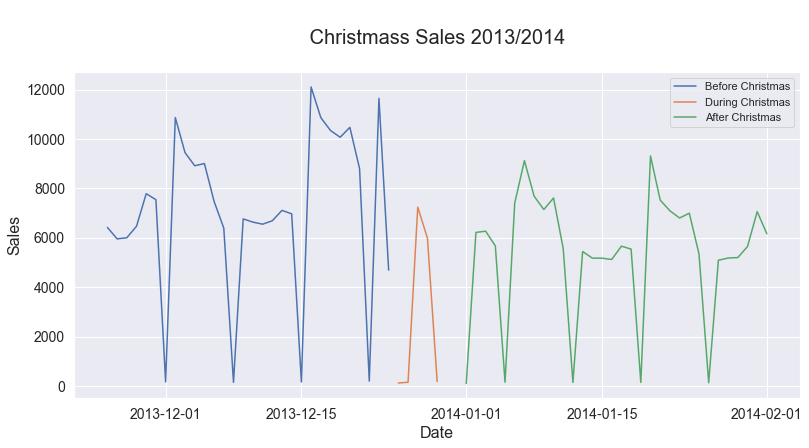

In [95]:
before_index = (df_train["Date"] >= pd.to_datetime("2013-11-25")) & (df_train["Date"] < pd.to_datetime("2013-12-25"))
before_xmass = df_train[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (df_train["Date"] >= pd.to_datetime("2013-12-25")) & (df_train["Date"] < pd.to_datetime("2013-12-30"))
during_xmass = df_train[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (df_train["Date"] >= pd.to_datetime("2014-01-01")) & (df_train["Date"] < pd.to_datetime("2014-02-02"))
after_xmass = df_train[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(13, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before Christmas')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During Christmas')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After Christmas')

plt.title("\n Christmass Sales 2013/2014 \n", size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()

### `Summary`

* Store type B has higher number of `customers` and `sales` from others store types.
* Store type B the most selling and crowded `assortment`.
* `Sales` is highly correlated to `customers`.
* Pomotion leads to increase in Sales and Customers in all store types but the impact is not that match in `store type B`.
* Store 'type B' is the most opened store type on all weekdays and has its highest sales on sundays than the other days.
* Assortment a and b are the most opened assortments on all weekdays and have their highest sales on sundays than the other days. The number of cusomers increase dramatically on sundays for assortment a while it is similar with other week days for assortment b.
* Sales are increased during Chirstmas week, especially the week before. This might be due to the fact that people buy more beauty products or some common medicines for precaution during Christmas celebration.
* Stores with the smallest competition distance have the highest sales. This indicates that the stores are located at city center or near hospitals. Even though having large distance between competitors is ideally considered great for sales, stores located at city centers will still get more sales regardless of competitors distance as there are more customers at city centers.